In [1]:
from pathlib import Path
import pandas as pd
# Mostrar floats com duas casas decimas
pd.set_option('display.float_format',  lambda x: '%.3g' % x)
pd.options.display.max_colwidth = 20
pd.options.display.max_columns = 20
pd.options.display.max_rows = 6

In [2]:
df_stocks = pd.read_csv("../data/magic_stocks.csv", parse_dates=["cutoff_date"])
df_stocks.rank_final = df_stocks.rank_final.astype(int)
df_stocks

,cutoff_date,codneg,codisi,especi,premed,totneg,quatot,voltot,year,codemi,...,net_debt,ebit,roic,market_cap,enterprise_value,earnings_yield,rank_roic,rank_ey,ranks_sum,rank_final
0,2011-04-11,CIEL3,BRCIELACNOR3,ON NM,4.36,4723,8.89e+06,3.88e+07,2011,CIEL,...,-2.51e+08,2.37e+09,2.51,5.95e+09,6.2e+09,0.383,2,21,23,1
1,2011-04-11,LREN3,BRLRENACNOR1,ON NM,6.56,3604,7.84e+06,5.15e+07,2011,LREN,...,-2.72e+07,4.04e+08,0.407,8.03e+08,8.3e+08,0.487,10,15,25,2
2,2011-04-11,TOTS3,BRTOTSACNOR8,ON NM,8.73,244,6.43e+05,5.62e+06,2011,TOTS,...,1.79e+08,2.12e+08,0.261,2.75e+08,9.53e+07,2.22,26,4,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,2022-04-11,RDNI3,BRRDNIACNOR9,ON NM,8.01,35,6.45e+03,5.17e+04,2022,RDNI,...,4.71e+08,1.98e+07,0.0179,3.51e+08,-1.21e+08,-0.164,188,181,369,193
1547,2022-04-11,AMAR3,BRAMARACNOR4,ON NM,2.91,3715,4.49e+06,1.31e+07,2022,AMAR,...,1.2e+09,4.8e+06,0.00218,7.61e+08,-4.4e+08,-0.0109,195,175,370,194
1548,2022-04-11,COGN3,BRCOGNACNOR2,ON NM,2.69,38694,5.98e+07,1.61e+08,2022,COGN,...,5.87e+09,7.84e+07,0.00399,5.05e+09,-8.19e+08,-0.0957,194,178,372,195


In [3]:
cols = ['cutoff_date', 'codneg', 'cia_nome', 'year',  'rank_final']
df_stocks = df_stocks.loc[:, cols]
df_stocks

,cutoff_date,codneg,cia_nome,year,rank_final
0,2011-04-11,CIEL3,CIELO S.A.,2011,1
1,2011-04-11,LREN3,LOJAS RENNER S.A.,2011,2
2,2011-04-11,TOTS3,TOTVS S.A.,2011,3
...,...,...,...,...,...
1546,2022-04-11,RDNI3,RNI NEGÓCIOS IMO...,2022,193
1547,2022-04-11,AMAR3,MARISA LOJAS S.A.,2022,194
1548,2022-04-11,COGN3,COGNA EDUCAÇÃO S.A.,2022,195


In [4]:
# Selecionar as 30 primeiras empresas do ranking
df_stocks.query('rank_final <= 30', inplace=True)
df_stocks.reset_index(drop=True, inplace=True)
df_stocks

,cutoff_date,codneg,cia_nome,year,rank_final
0,2011-04-11,CIEL3,CIELO S.A.,2011,1
1,2011-04-11,LREN3,LOJAS RENNER S.A.,2011,2
2,2011-04-11,TOTS3,TOTVS S.A.,2011,3
...,...,...,...,...,...
357,2022-04-11,RAPT4,RANDON S.A. IMPL...,2022,28
358,2022-04-11,ALLD3,ALLIED TECNOLOGI...,2022,29
359,2022-04-11,CLSC4,CENTRAIS ELET DE...,2022,30


In [5]:
PROCESSED_PATH = Path("/mnt/aq_disk/data/HistoricalQuotations/processed/")
path = PROCESSED_PATH / "base_adj.feather"
df_b3 = pd.read_feather(path)
df_b3

,datneg,codneg,nomres,codisi,especi,codbdi,tpmerc,preabe,premax,premin,...,preexe,totneg,quatot,voltot,dismes,datven,prazot,event1,event2,ajuste
0,1995-01-02,ACE 3,ACESITA,ACESACON,ON *INT,2,10,0.0521,0.0521,0.0521,...,0,1,2.42e+08,1.26e+04,119,NaT,0,,,0.826
1,1995-01-02,ACE 4,ACESITA,ACESACPN,PN *INT,2,10,0.0603,0.0603,0.0595,...,0,5,6.41e+09,3.85e+05,119,NaT,0,,,0.826
2,1995-01-02,ACE 4,ACESITA,ACESACPN,PN *INT,96,20,0.0603,0.0603,0.0595,...,0,4,3.69e+07,2.22e+03,119,NaT,0,,,0.826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907284,2022-06-06,Z1TS34,ZOETIS INC,BRZ1TSBDR006,DRN,2,10,204,204,204,...,0,1,20,4.08e+03,109,NaT,0,,,1
10907285,2022-06-06,Z2EN34,ZENDESK INC,BRZ2ENBDR007,DRN,2,10,27.6,27.7,27.6,...,0,2,1.17e+03,3.25e+04,100,NaT,0,,,1
10907286,2022-06-06,Z2SC34,ZSCALER INC,BRZ2SCBDR000,DRN,2,10,25.1,25.1,25.1,...,0,1,3,75.3,100,NaT,0,,,1


In [14]:
# Filtrar somente ações depois de 2011
df_prices = df_b3.copy()
df_prices.query(
    'codbdi == 2 and datneg >= "2011.01.01"',
    inplace=True
)
df_prices.reset_index(drop=True, inplace=True)
cols = ['datneg', 'codneg', 'codisi', 'especi', 'premed', 'totneg', 'quatot', 'voltot']
df_prices = df_prices.loc[:, cols]
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot
0,2011-01-03,ABCB4,BRABCBACNPR4,PN EJ N2,6.24,226,5.07e+05,3.17e+06
1,2011-01-03,AEDU3,BRAEDUACNOR9,ON NM,13.8,1348,1.47e+06,2.02e+07
2,2011-01-03,ALLL3,BRALLLACNOR6,ON NM,15.2,2277,1.25e+06,1.9e+07
...,...,...,...,...,...,...,...,...
1142299,2022-06-06,Z1TS34,BRZ1TSBDR006,DRN,204,1,20,4.08e+03
1142300,2022-06-06,Z2EN34,BRZ2ENBDR007,DRN,27.7,2,1.17e+03,3.25e+04
1142301,2022-06-06,Z2SC34,BRZ2SCBDR000,DRN,25.1,1,3,75.3


In [15]:
df_prices = df_prices.merge(right=df_stocks, how='inner')
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final
0,2011-01-03,ALPA4,BRALPAACNPR7,PN N1,5.02,312,2.61e+05,1.31e+06,2017-04-10,ALPARGATAS S.A.,2017,26
1,2011-01-04,ALPA4,BRALPAACNPR7,PN N1,4.98,97,2.07e+05,1.03e+06,2017-04-10,ALPARGATAS S.A.,2017,26
2,2011-01-05,ALPA4,BRALPAACNPR7,PN N1,4.97,226,1.47e+06,7.29e+06,2017-04-10,ALPARGATAS S.A.,2017,26
...,...,...,...,...,...,...,...,...,...,...,...,...
861348,2022-06-02,SYNE3,BRSYNEACNOR2,ON NM,5.13,2604,8.7e+05,4.46e+06,2022-04-11,SYN PROP & TECH ...,2022,3
861349,2022-06-03,SYNE3,BRSYNEACNOR2,ON NM,5.38,3053,1.09e+06,5.88e+06,2022-04-11,SYN PROP & TECH ...,2022,3
861350,2022-06-06,SYNE3,BRSYNEACNOR2,ON NM,5.25,3006,6.54e+05,3.43e+06,2022-04-11,SYN PROP & TECH ...,2022,3


In [16]:
cutoff_list = sorted(list(df_prices.cutoff_date.drop_duplicates()))
cutoff_list.append(cutoff_list[-1] + pd.DateOffset(years=1))
cutoff_dict = dict(enumerate(cutoff_list))
cutoff_dict

{0: Timestamp('2011-04-11 00:00:00'),
 1: Timestamp('2012-04-09 00:00:00'),
 2: Timestamp('2013-04-10 00:00:00'),
 3: Timestamp('2014-04-10 00:00:00'),
 4: Timestamp('2015-04-10 00:00:00'),
 5: Timestamp('2016-04-11 00:00:00'),
 6: Timestamp('2017-04-10 00:00:00'),
 7: Timestamp('2018-04-10 00:00:00'),
 8: Timestamp('2019-04-10 00:00:00'),
 9: Timestamp('2020-04-09 00:00:00'),
 10: Timestamp('2021-04-12 00:00:00'),
 11: Timestamp('2022-04-11 00:00:00'),
 12: Timestamp('2023-04-11 00:00:00')}

In [17]:
df_prices['cutoff_order'] = df_prices['cutoff_date'].rank(method='dense').astype(int)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,cutoff_order
0,2011-01-03,ALPA4,BRALPAACNPR7,PN N1,5.02,312,2.61e+05,1.31e+06,2017-04-10,ALPARGATAS S.A.,2017,26,7
1,2011-01-04,ALPA4,BRALPAACNPR7,PN N1,4.98,97,2.07e+05,1.03e+06,2017-04-10,ALPARGATAS S.A.,2017,26,7
2,2011-01-05,ALPA4,BRALPAACNPR7,PN N1,4.97,226,1.47e+06,7.29e+06,2017-04-10,ALPARGATAS S.A.,2017,26,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861348,2022-06-02,SYNE3,BRSYNEACNOR2,ON NM,5.13,2604,8.7e+05,4.46e+06,2022-04-11,SYN PROP & TECH ...,2022,3,12
861349,2022-06-03,SYNE3,BRSYNEACNOR2,ON NM,5.38,3053,1.09e+06,5.88e+06,2022-04-11,SYN PROP & TECH ...,2022,3,12
861350,2022-06-06,SYNE3,BRSYNEACNOR2,ON NM,5.25,3006,6.54e+05,3.43e+06,2022-04-11,SYN PROP & TECH ...,2022,3,12


In [18]:
df_prices['next_cutoff'] = df_prices['cutoff_order'].map(cutoff_dict)
df_prices.drop(columns='cutoff_order', inplace=True)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff
0,2011-01-03,ALPA4,BRALPAACNPR7,PN N1,5.02,312,2.61e+05,1.31e+06,2017-04-10,ALPARGATAS S.A.,2017,26,2018-04-10
1,2011-01-04,ALPA4,BRALPAACNPR7,PN N1,4.98,97,2.07e+05,1.03e+06,2017-04-10,ALPARGATAS S.A.,2017,26,2018-04-10
2,2011-01-05,ALPA4,BRALPAACNPR7,PN N1,4.97,226,1.47e+06,7.29e+06,2017-04-10,ALPARGATAS S.A.,2017,26,2018-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861348,2022-06-02,SYNE3,BRSYNEACNOR2,ON NM,5.13,2604,8.7e+05,4.46e+06,2022-04-11,SYN PROP & TECH ...,2022,3,2023-04-11
861349,2022-06-03,SYNE3,BRSYNEACNOR2,ON NM,5.38,3053,1.09e+06,5.88e+06,2022-04-11,SYN PROP & TECH ...,2022,3,2023-04-11
861350,2022-06-06,SYNE3,BRSYNEACNOR2,ON NM,5.25,3006,6.54e+05,3.43e+06,2022-04-11,SYN PROP & TECH ...,2022,3,2023-04-11


In [19]:
df_prices.query('cutoff_date <= datneg <= next_cutoff', inplace=True)
df_prices.sort_values(['codneg', 'datneg'], inplace=True, ignore_index=True)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82044,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11
82045,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11
82046,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11


In [20]:
df_prices['first_value'] = df_prices.groupby(by=['codneg', 'cutoff_date'])['premed'].transform('first')
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10,15.2
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10,15.2
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82044,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11,7.35
82045,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11,7.35
82046,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11,7.35


In [21]:
df_prices['price_n'] = 100 * df_prices.premed / df_prices.first_value 
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10,15.2,100
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10,15.2,100
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10,15.2,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82044,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11,7.35,83.5
82045,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11,7.35,83.9
82046,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11,7.35,83


In [22]:
df_prices['pct_change'] = df_prices.groupby(by=['codneg', 'next_cutoff'])['price_n'].pct_change()
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n,pct_change
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10,15.2,100,NaN
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10,15.2,100,0.00219
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,21,2017-04-10,15.2,101,0.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82044,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11,7.35,83.5,0.00491
82045,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11,7.35,83.9,0.00489
82046,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,30,2022-04-11,7.35,83,-0.0113


In [23]:
df_prices.sort_values('pct_change', ascending=True).head(6)

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n,pct_change
65964,2020-03-18,SMLS3,BRSMLSACNOR1,ON NM,8.93,14016,5.32e+06,4.75e+07,2019-04-10,SMILES FIDELIDAD...,2019,8,2020-04-09,34.5,25.9,-0.331
3236,2020-03-18,AMAR3,BRAMARACNOR4,ON NM,3.54,17634,7.82e+06,2.78e+07,2019-04-10,MARISA LOJAS S.A.,2019,10,2020-04-09,6.25,56.7,-0.331
65962,2020-03-16,SMLS3,BRSMLSACNOR1,ON NM,13.1,16910,5.62e+06,7.34e+07,2019-04-10,SMILES FIDELIDAD...,2019,8,2020-04-09,34.5,37.9,-0.317
20845,2020-03-12,CVCB3,BRCVCBACNOR1,ON NM,12.2,14961,7e+06,8.57e+07,2019-04-10,CVC BRASIL OPERA...,2019,27,2020-04-09,46.3,26.5,-0.315
7160,2020-03-12,BRKM5,BRBRKMACNPA4,PNA N1,13.9,19148,9.57e+06,1.33e+08,2019-04-10,BRASKEM S.A.,2019,2,2020-04-09,39.7,34.9,-0.27
20849,2020-03-18,CVCB3,BRCVCBACNOR1,ON NM,6.64,31101,1.05e+07,6.99e+07,2019-04-10,CVC BRASIL OPERA...,2019,27,2020-04-09,46.3,14.3,-0.262


In [24]:
df_return = df_prices.groupby(by=['datneg', 'next_cutoff'])['price_n'].mean().reset_index()
df_return

,datneg,next_cutoff,price_n
0,2011-04-11,2012-04-09,100
1,2011-04-12,2012-04-09,99.2
2,2011-04-13,2012-04-09,98.9
...,...,...,...
2769,2022-06-02,2023-04-11,103
2770,2022-06-03,2023-04-11,103
2771,2022-06-06,2023-04-11,102


In [25]:
df_return['last_group_price'] = df_return.groupby(by=['next_cutoff'])['price_n'].transform('last')
df_return

,datneg,next_cutoff,price_n,last_group_price
0,2011-04-11,2012-04-09,100,117
1,2011-04-12,2012-04-09,99.2,117
2,2011-04-13,2012-04-09,98.9,117
...,...,...,...,...
2769,2022-06-02,2023-04-11,103,102
2770,2022-06-03,2023-04-11,103,102
2771,2022-06-06,2023-04-11,102,102


In [26]:
factor = 1
df_return['price_acum'] = 0
for i in df_return.index:
    df_return.loc[i, 'price_acum'] = df_return.loc[i, 'price_n'] * factor
    if df_return.loc[i].datneg ==  df_return.loc[i].next_cutoff:
        factor = factor * df_return.loc[i, 'price_n'] / 100
        print(i, factor)

248 1.1698717138273735
495 1.3168324232079045
746 1.1920379636205747
994 1.1936042224750605
1240 0.9829792667832915
1491 1.2672557528825572
1737 1.589131918465107
1984 1.8083796201466873
2234 1.6676508164217723
2482 2.7006400545174922
2732 2.993506496669545


In [27]:
df_return

,datneg,next_cutoff,price_n,last_group_price,price_acum
0,2011-04-11,2012-04-09,100,117,100
1,2011-04-12,2012-04-09,99.2,117,99.2
2,2011-04-13,2012-04-09,98.9,117,98.9
...,...,...,...,...,...
2769,2022-06-02,2023-04-11,103,102,309
2770,2022-06-03,2023-04-11,103,102,308
2771,2022-06-06,2023-04-11,102,102,304


In [28]:
df_return.loc[247:250]

,datneg,next_cutoff,price_n,last_group_price,price_acum
247,2012-04-05,2012-04-09,118,117,118
248,2012-04-09,2012-04-09,117,117,117
249,2012-04-09,2013-04-10,100,113,117
250,2012-04-10,2013-04-10,99.8,113,117


In [24]:
df_return.loc[494:498]

,datneg,next_cutoff,price_n,last_group_price,price_acum
494,2013-04-09,2013-04-10,99.3,97.5,116
495,2013-04-10,2013-04-10,97.5,97.5,113
496,2013-04-10,2014-04-10,100,86.5,113
497,2013-04-11,2014-04-10,99.1,86.5,112
498,2013-04-12,2014-04-10,98.7,86.5,112


In [29]:
df_return.drop_duplicates('datneg', inplace=True)
df_return

,datneg,next_cutoff,price_n,last_group_price,price_acum
0,2011-04-11,2012-04-09,100,117,100
1,2011-04-12,2012-04-09,99.2,117,99.2
2,2011-04-13,2012-04-09,98.9,117,98.9
...,...,...,...,...,...
2769,2022-06-02,2023-04-11,103,102,309
2770,2022-06-03,2023-04-11,103,102,308
2771,2022-06-06,2023-04-11,102,102,304


In [30]:
cols = ['datneg', 'premed']
df_bova = df_b3.query('codneg == "BOVA11" and datneg >= "2011-04-11"')[cols]
df_bova.reset_index(drop=True, inplace=True)
df_bova

,datneg,premed
0,2011-04-11,67.8
1,2011-04-12,66.4
2,2011-04-13,65.9
...,...,...
2758,2022-06-02,108
2759,2022-06-03,107
2760,2022-06-06,107


In [31]:
df_bova.premed = 100 * df_bova.premed / df_bova.loc[0, 'premed']
df_bova

,datneg,premed
0,2011-04-11,100
1,2011-04-12,98
2,2011-04-13,97.2
...,...,...
2758,2022-06-02,160
2759,2022-06-03,158
2760,2022-06-06,158


In [32]:
df_return = df_return.merge(right=df_bova, how='inner')
df_return.rename(
    columns={"price_acum": "MagicFormula", "premed": "BOVA11"}, inplace=True)
df_return.set_index('datneg', inplace=True)
df_return

,next_cutoff,price_n,last_group_price,MagicFormula,BOVA11
datneg,,,,,
2011-04-11,2012-04-09,100,117,100,100
2011-04-12,2012-04-09,99.2,117,99.2,98
2011-04-13,2012-04-09,98.9,117,98.9,97.2
...,...,...,...,...,...
2022-06-02,2023-04-11,103,102,309,160
2022-06-03,2023-04-11,103,102,308,158
2022-06-06,2023-04-11,102,102,304,158


<AxesSubplot:xlabel='datneg'>

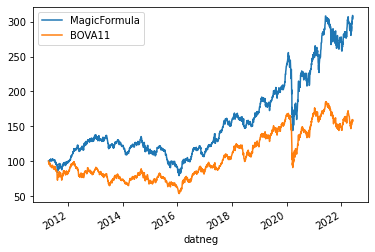

In [33]:
df_return[['MagicFormula', 'BOVA11']].plot()

<AxesSubplot:xlabel='datneg'>

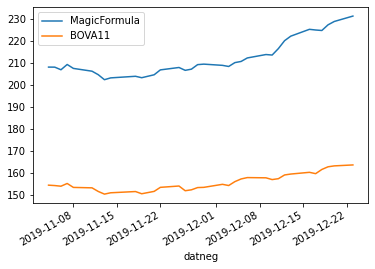

In [35]:
df_return.query('"2019-11-01" < datneg < "2019-12-24"')[['MagicFormula', 'BOVA11']].plot()

In [75]:
df_return.query('"2019-11-01" < datneg < "2019-12-24"')

,next_cutoff,price_n,last_group_price,MagicFormula,BOVA11
datneg,,,,,
2019-11-04,2020-04-09,106,85.4,135,154
2019-11-05,2020-04-09,106,85.4,136,154
2019-11-06,2020-04-09,106,85.4,135,154
...,...,...,...,...,...
2019-12-19,2020-04-09,119,85.4,152,163
2019-12-20,2020-04-09,120,85.4,153,163
2019-12-23,2020-04-09,122,85.4,155,164
